# Read Me

- Dalam kasus ini, saya akan menggunakan 2 cara, yaitu cara yang pertama mengikuti instruksi yang ada di soal
- Yang ke 2 saya menggunakan model untuk membandingkan.
- Lalu saya akan coba untuk memprediksi harga dari sebuah apartemen dengan spesifikasi sebagai berikut:
    - area = 650000000
    - age = 5
    - floor = 4
    - rooms = 6
    - toilets = 4
    - garage = 1
    - elevator = 1
    - tras = 0
    - conservation_1 = 1
    - conservation_2 = 0
    - conservation_3 = 0

# Cara Pertama Sesuai Instruksi
***

## 0. Load Library

- Memuat beberapa library yang akan saya gunakan dalam analisis ini.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## 1. Load the Datasets
- Memuat data yang akan digunakan.

In [2]:
df = pd.read_csv('victoria.csv')

## 2. Exploratory Data Analysis (EDA)
- Melakukan EDA untuk mengetahui secara lebih mendalam dari data yang digunakan.

In [3]:
#Melihat 5 data teratas
df.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,2,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,3,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,4,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,5,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


In [4]:
#Melihat dimensi dari data
df.shape

(218, 16)

- Terdapat 218 rows dan 16 features/columns

In [5]:
#Melihat statistika deskriptis dari data mulai dari mean, stdev, min, max dan quartile.
#Untuk data numerikal
df.describe()

,row.labels,age,floor,rooms,toilets,garage,elevator,tras
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,109.500000,19.899083,4.440367,4.853211,1.467890,0.243119,0.798165,0.807339
std,63.075352,14.595590,2.126988,0.634285,0.500116,0.450881,0.402293,0.406787
min,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,55.250000,11.000000,3.000000,5.000000,1.000000,0.000000,1.000000,1.000000
50%,109.500000,16.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000
75%,163.750000,24.000000,5.000000,5.000000,2.000000,0.000000,1.000000,1.000000
max,218.000000,118.000000,12.000000,7.000000,2.000000,2.000000,1.000000,2.000000


In [6]:
#Deskripsi dari data untuk data kategorikal
df.describe(include='object')

,totalprice,area,zone,category,out,conservation,streetcategory,heating
count,218,218,218,218,218,218,218,218
unique,155,207,23,7,4,4,4,4
top,270000,1065999985,Z41,3B,E100,1A,S3,3A
freq,7,2,18,77,122,161,107,149


In [7]:
#Melihat general information dari data mulai dari nama features, jenis data dan jumlah data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 16 columns):
row.labels        218 non-null int64
totalprice        218 non-null object
area              218 non-null object
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null int64
dtypes: int64(8), object(8)
memory usage: 27.3+ KB


In [8]:
#Data Cleansing
#Agar featues totalprice dan area bisa diconvert ke dalam numerikal
df['totalprice'] = df['totalprice'].replace(r'[,]','.', regex=True)
df['area'] = df['area'].replace(r'[,]','.', regex=True)

In [9]:
#Mengubah ke data numerik agar bisa dimasukan ke dalam model
df['totalprice'] = pd.to_numeric(df['totalprice'])
df['area'] = pd.to_numeric(df['area'])

## 3. Data Visualization
- Melihat karakteristik dari data dengan visualisasi.

In [10]:
df.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000.0,7.531000e+09,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,2,409000.0,1.006500e+09,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,3,200000.0,8.887000e+09,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,4,180000.0,6.261000e+09,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,5,443600.0,1.461500e+09,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


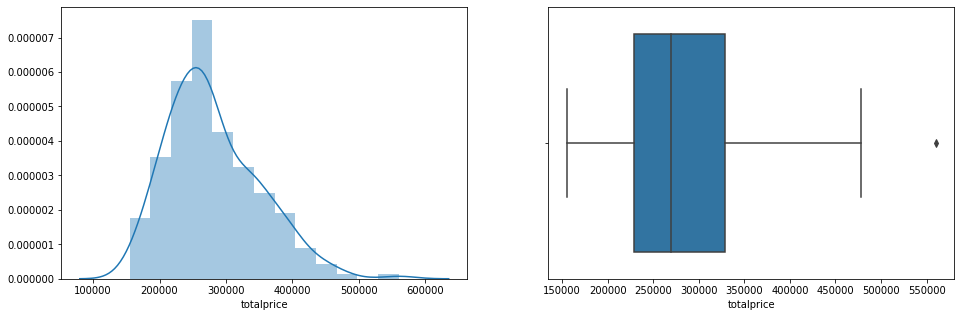

In [11]:
#Univariate Analysis Price
f = plt.figure(figsize=(16,5))

f.add_subplot(1,2,1)
sns.distplot(df['totalprice'])

f.add_subplot(1,2,2)
sns.boxplot(df['totalprice'])

- Dari distplot Dapat dilihat bahwa harga dari apartment terpusat di kisaran harga 250000.
- Dari boxplot dapat dilihat bahwa terdapat 1 outliers yaitu di angka 550000.

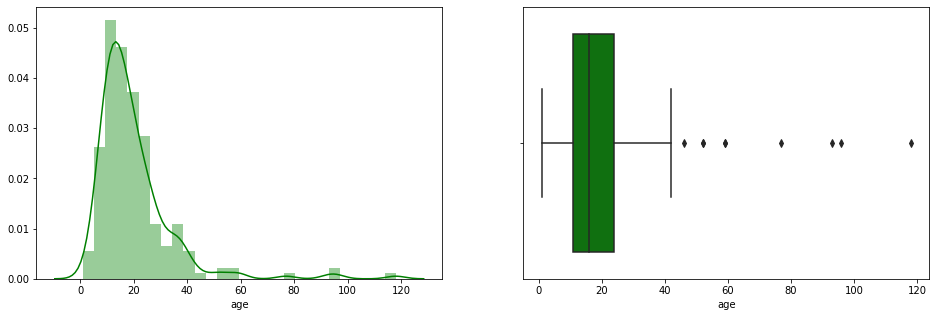

In [12]:
#Univariate Analysis Age
f = plt.figure(figsize=(16,5))

f.add_subplot(1,2,1)
sns.distplot(df['age'], color='green')

f.add_subplot(1,2,2)
sns.boxplot(df['age'], color='green')

- Dari distplot Dapat dilihat persebaran dari umur apartmen terpusat di kisaran umur 20 tahun.
- Dari boxplot dapat dilihat bahwa terdapat beberapa outliers.

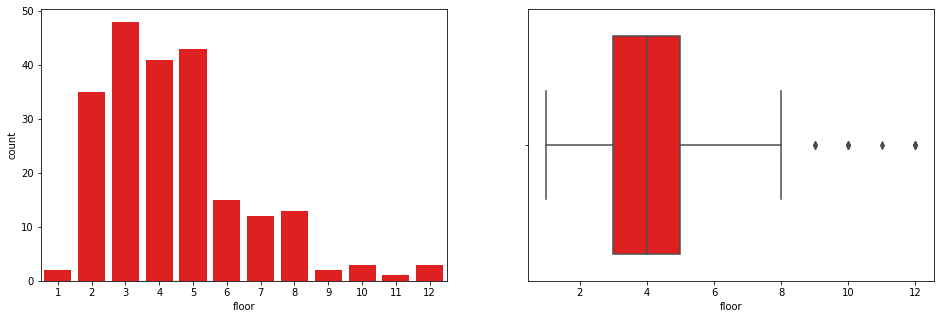

In [13]:
#Univariate Analysis Floor
f = plt.figure(figsize=(16,5))

f.add_subplot(1,2,1)
sns.countplot(df['floor'], color='red')

f.add_subplot(1,2,2)
sns.boxplot(df['floor'], color='red')

- Secara umum, jumlah lantai dalam apartemen yang dijual adalah di angka 2-5 lantai.
- lantai 9 keatas termasuk ke dalam outliers.

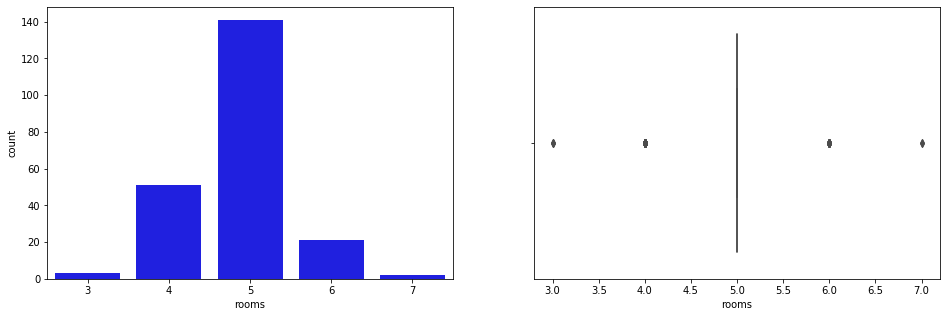

In [14]:
#Univariate Analysis rooms
f = plt.figure(figsize=(16,5))

f.add_subplot(1,2,1)
sns.countplot(df['rooms'], color='blue')

f.add_subplot(1,2,2)
sns.boxplot(df['rooms'], color='blue')

- Wow dari gambar dapat diluhat bahwa hampir seetengah dari apartmen memiliki jumlah 5 ruangan.

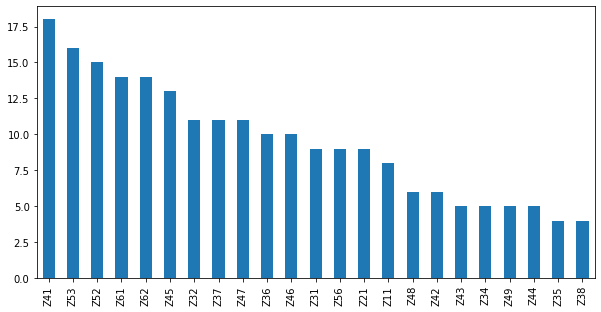

In [15]:
plt.figure(figsize=(10,5))
df['zone'].value_counts().plot('bar')
plt.show()

- Apartemen paling banyak terdapat di zona Z41.

In [16]:
#Mencari korelasi antar features
df.corr().style.background_gradient().set_precision(2)

,row.labels,totalprice,area,age,floor,rooms,toilets,garage,elevator,tras
row.labels,1,-0.1,0.15,-0.018,-0.0067,-0.12,-0.066,-0.085,0.068,-0.0066
totalprice,-0.1,1,-0.36,-0.27,0.029,0.53,0.69,0.52,0.51,0.27
area,0.15,-0.36,1,-0.14,-0.018,-0.28,-0.28,-0.18,-3.2e-05,0.0038
age,-0.018,-0.27,-0.14,1,-0.081,-0.083,-0.28,-0.21,-0.41,-0.27
floor,-0.0067,0.029,-0.018,-0.081,1,0.13,0.1,-0.03,0.2,-0.12
rooms,-0.12,0.53,-0.28,-0.083,0.13,1,0.42,0.21,0.35,0.033
toilets,-0.066,0.69,-0.28,-0.28,0.1,0.42,1,0.45,0.45,0.22
garage,-0.085,0.52,-0.18,-0.21,-0.03,0.21,0.45,1,0.27,0.16
elevator,0.068,0.51,-3.2e-05,-0.41,0.2,0.35,0.45,0.27,1,0.21
tras,-0.0066,0.27,0.0038,-0.27,-0.12,0.033,0.22,0.16,0.21,1


- Korelasi totalprice dan toilets, rooms, garage, dan elevator kuat positif.
- Korelasi tras dan totalprice cukup kuat positif.
- Korelasi floor dan totalprice sangat lemah karena mendekati 0.
- Yaitu ketika jumlah toilets bertambah maka harga apartmen juga ikut bertambah.
***
- Korelasi antara totalprice area, age memiliki korelasi cukup kuat namun negatif.
- Yaitu dengan bertambahnya age dari apartmen maka harga apartemen akan turun.

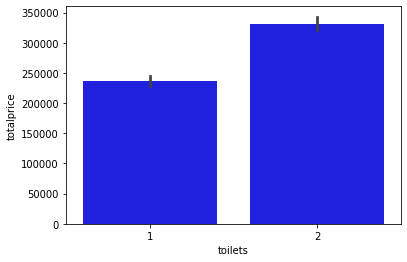

In [17]:
#Bivariate Analysis antara totalprice dan toilets
sns.barplot(data=df, x=df['toilets'], y=df['totalprice'], color='blue')

- Dapat dilihat bahwa semakin banyak toilets maka akan memberi dampak semakin mahal sebuah apartment.

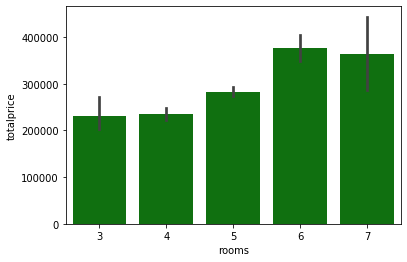

In [18]:
#Bivariate Analysis antara totalprice dan rooms
sns.barplot(data=df, x=df['rooms'], y=df['totalprice'], color='green')

- Semakin banyak rooms maka semakin mahal sebuah apartment

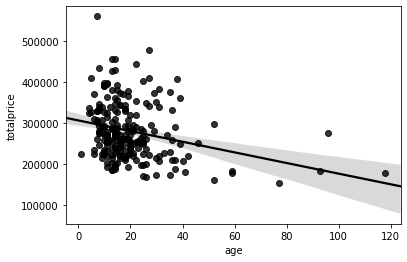

In [19]:
#Bivariate Analysis antara totalprice dan rooms
sns.regplot(data=df, x=df['age'], y=df['totalprice'], color='black')

- Hubungan antara umur dan totalprice terindikasi kuat negatif dimana setiap pertambahan umur akan mengakibatkan penurunan harga dari apartment

## 4. Feature Selection

- Saya akan semua memilih variabel dengan type data numerik karena model machine learning hanya menerima type data yang berbentuk numerik.
- Terkecuali conservation yang akan saya rubah ke dalam bentuk numerikal.

In [20]:
#Mengubah nilai conservation
dicti = {
    '2B':3,
    '3A':3,
    '2A':2,
    '1A':1
}
df['conservation'] = df['conservation'].replace(dicti)

In [21]:
new_df = df.copy()

In [22]:
#Menghapus kolom yang tidak perlu
drop = ['row.labels','zone', 'category', 'out', 'streetcategory', 'heating']
new_df.drop(columns=drop, inplace=True)

In [23]:
#Membuat one hot encoding
new_df['conservation'] = pd.Categorical(new_df['conservation'])
new_df = pd.get_dummies(new_df)

## 5. Modelling

In [24]:
#Memakai Linear regression
lin_reg = LinearRegression()

In [25]:
#membuat variabel x dan y
x = new_df.drop(columns = ['totalprice'])
y = new_df['totalprice']

In [26]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [27]:
#training model
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#melakukan prediksi
y_pred = lin_reg.predict(x_test)

In [29]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [30]:
#check error
print(f'Nilai MAE {mean_absolute_error(y_pred, y_test)}')
print(f'Nilai MAPE {mean_absolute_percentage_error(y_test, y_pred)})')

Nilai MAE 26665.984496903933
Nilai MAPE 9.338433427252056)


- Model memiliki error sebesar 26 ribu dengan nilai MAPE sebesar 9%

# Cara Kedua Menggunakan Sedikit Modifikasi
- Selain menggunakan Linear Regression, saya juga akan menggunakan algoritma lain yaitu DecisionTreeRegressor, RandomForestRegressor.

### Menggunakan Decision Tree Regressor

In [31]:
tree = DecisionTreeRegressor()

In [32]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

#training model
tree.fit(x_train, y_train)

#melakukan prediksi
y_pred = tree.predict(x_test)

In [33]:
#check error
print(f'Nilai MAE {mean_absolute_error(y_pred, y_test)}')
print(f'Nilai MAPE {mean_absolute_percentage_error(y_test, y_pred)})')

Nilai MAE 40243.181818181816
Nilai MAPE 13.949357285052233)


In [34]:
forest = RandomForestRegressor()

In [35]:
#training model
forest.fit(x_train, y_train)

#melakukan prediksi
y_pred = forest.predict(x_test)

In [36]:
#check error
print(f'Nilai MAE {mean_absolute_error(y_pred, y_test)}')
print(f'Nilai MAPE {mean_absolute_percentage_error(y_test, y_pred)})')

Nilai MAE 27158.18181818182
Nilai MAPE 9.463090108723863)


# Kesimpulan
- Dari 3 model yang digunakan yaitu Linear regression, Decision Tree, dan Random Forest didapatkan metode Linear Regression memberikan nilai MAE dan MAPE yang terkecil.
- Model Linear regression yang dipilih dengan MAE sekitar 26 ribu dan MAPE 9%.
- Berdasarkan correlation score, didapatkan bahwa:
    - Korelasi totalprice dan toilets, rooms, garage, dan elevator kuat positif.
    - Korelasi tras dan totalprice cukup kuat positif.
    - Korelasi floor dan totalprice sangat lemah karena mendekati 0.
    - Yaitu ketika jumlah toilets bertambah maka harga apartmen juga ikut bertambah.
    - Korelasi antara totalprice area, age memiliki korelasi cukup kuat namun negatif.
    - Yaitu dengan bertambahnya age dari apartmen maka harga apartemen akan turun.

# Prediction
- Melakukan sedikit prediksi menggunakan model Linear Regression karena mendapatkan hasil RMSE yang paling kecil.

In [37]:
#training model menggunakan semua data x dan y.
lin_reg.fit(x, y)

#melakukan prediksi
y_pred = lin_reg.predict(x_test)

#check error
print(f'Nilai MAE {mean_absolute_error(y_pred, y_test)}')
print(f'Nilai MAPE {mean_absolute_percentage_error(y_test, y_pred)})')

Nilai MAE 24144.188870522263
Nilai MAPE 8.385044261998502)


- Dengan menggunakan semua data x dan y didapatkan akurasi dari MAE dan MAPE yang lebih kecil dari saat training.

In [38]:
#Melakukan prediksi
data = [[6500000000, 5, 4, 6, 4, 1, 1, 0, 1, 0, 0]]
lin_reg.predict(data)

array([439388.66765608])

- Dengan menggunakan awal pertama didapatkan harga dari apartmen dengan spesifikasi diatas adalah 439.388 dollars